In [59]:
using Plots, Interpolations, Polynomials, LinearAlgebra,Statistics,DataFrames,Measures

In [60]:
opints_nr = 0.0:7.0
x_vals = [x for x in opints_nr]
# y_vals = [rand(Uniform(0.0,20.0)) for _ in opints_nr]
y_vals = [rand() for _ in opints_nr]
distrib = 0:0.01:7

0.0:0.01:7.0

## Zad 1
Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

In [61]:
function Lagrange(x_vals,y_vals,x)
    P = 0
    len = size(x_vals)[1]
    
    for j in 1:len
        L = 1
        for i in 1:len
            if i != j
                L *= (x-x_vals[i])/(x_vals[j]-x_vals[i])
            end
        end
        P += (y_vals[j]*L)
    end
    return P
end


Lagrange (generic function with 1 method)

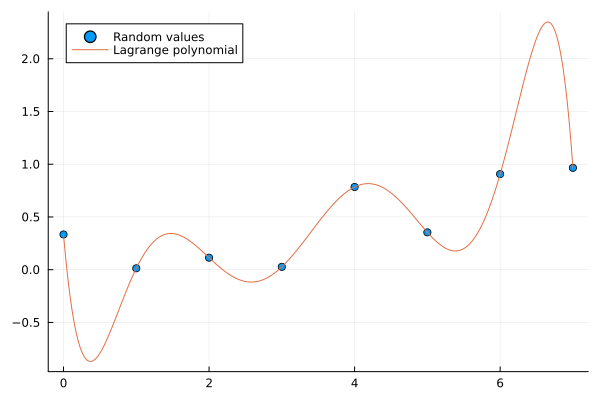

In [62]:
lagrange_polynom = [Lagrange(x_vals,y_vals,x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,lagrange_polynom,label="Lagrange polynomial")

## Zad 2
Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>


In [63]:
function NewtonInterpolation(x_vals, y_vals)
    n = length(x_vals)
    d = zeros(n, n)
    d[:, 1] .= y_vals
    for j = 2:n
        for i = j:n
            d[i, j] = (d[i, j-1] - d[i-1, j-1]) / (x_vals[i] - x_vals[i-j+1])
        end
    end
    return d
end

function Newton(x_vals, y_vals, x)
    n = length(x_vals)
    divided = diag(NewtonInterpolation(x_vals, y_vals))
    result = divided[n]
    for i = n-1:-1:1
        result = divided[i] + (x - x_vals[i]) * result
    end
    return result
end


Newton (generic function with 1 method)

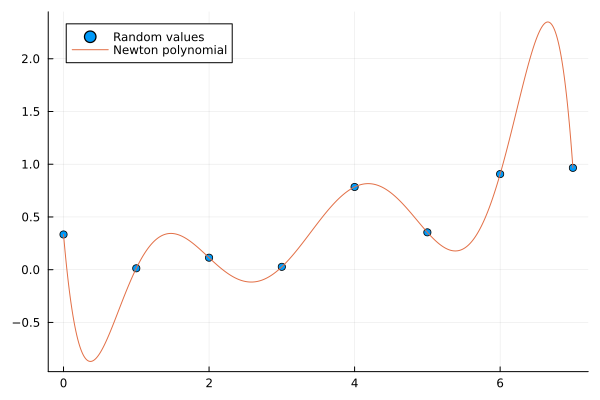

In [64]:
new_polynom = [Newton(x_vals,y_vals, x) for x in distrib]
scatter(x_vals,y_vals,label="Random values")
plot!(distrib,new_polynom,label="Newton polynomial")

### Zad3
Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

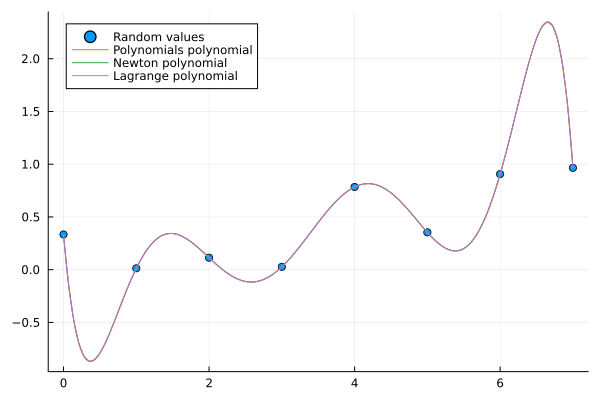

In [65]:
# using Polynomials
pack_polynom=fit(x_vals, y_vals)
scatter(x_vals,y_vals,label="Random values")
plot!(pack_polynom, extrema(x_vals)...,label="Polynomials polynomial")
plot!(distrib,new_polynom,label="Newton polynomial")
plot!(distrib,lagrange_polynom,label="Lagrange polynomial")

Zauważamy trzykrotnie dokładnie te same wyniki - jest to spodziewany efekt, gdyż wszystkie 3 metody powinny zwracać ten sam wielomian

### Zad4
Porównać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonać pomiaru 10 razy i policzyć wartość średnią oraz oszacować błąd pomiaru za pomocą odchylenia standardowego; wyniki przedstawić na wykresach. <b>(2 pkt)</b>

In [66]:
df = DataFrame(Nodes=Int[],Lagr=Float64[],Newt1=Float64[],Newt2=Float64[],Polyn1=Float64[],Polyn2=Float64[])
for i in 5:50:505
    for j in 1:11
        h = 10/i
        x_test = 0:h:10
        y_test = [rand() for x in x_test]
        test = 0:0.01:10
        lagr, lagr_t = @timed [Lagrange(x_test, y_test, x) for x in test]
        newt, newt_t1 = @timed NewtonInterpolation(x_test, y_test)
        newt2, newt_t2 = @timed[Newton(x_test, y_test, x) for x in test]
        polyn, polyn_t1 = @timed fit(x_test, y_test)
        polyn2, polyn_t2 = @timed [polyn(x) for x in test]
        if j > 1
            push!(df,hcat([i],lagr_t,newt_t1,newt_t2,polyn_t1, polyn_t2))
        end
    end
end


In [67]:
df2 = combine(groupby(df,:Nodes),
    :Lagr => mean => :m_lagr,:Lagr => std => :s_lagr,
    :Newt1 => mean => :m_newt, :Newt1 => std => :s_newt,
    :Newt2 => mean => :m_newt2, :Newt2 => std => :s_newt2,
    :Polyn1 => mean => :m_polyn, :Polyn1 => std => :s_polyn,
    :Polyn2 => mean => :m_polyn2, :Polyn2 => std => :s_polyn2)
println(df2)

11×11 DataFrame
 Row │ Nodes  m_lagr      s_lagr      m_newt      s_newt       m_newt2     s_newt2    m_polyn     s_polyn     m_polyn2    s_polyn2    
     │ Int64  Float64     Float64     Float64     Float64      Float64     Float64    Float64     Float64     Float64     Float64     
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │     5  0.00020286  3.87316e-5  6.21e-6     8.7269e-6    0.00048844  1.577e-5   7.13e-6     3.22871e-6  1.128e-5    3.39667e-6
   2 │    55  0.015692    0.00161249  4.835e-5    1.42164e-5   0.0337167   0.0364686  2.526e-5    2.80127e-6  7.938e-5    8.89292e-6
   3 │   105  0.0612991   0.00720007  0.00011099  5.69715e-5   0.0863558   0.0139887  6.682e-5    1.69097e-5  0.00022271  6.36297e-5
   4 │   155  0.118763    0.00867399  0.00019556  5.66785e-5   0.188116    0.0241634  0.00011115  2.67235e-5  0.0003243   8.51204e-5
   5 │   205  0.1306      0.0117165   0.0002480

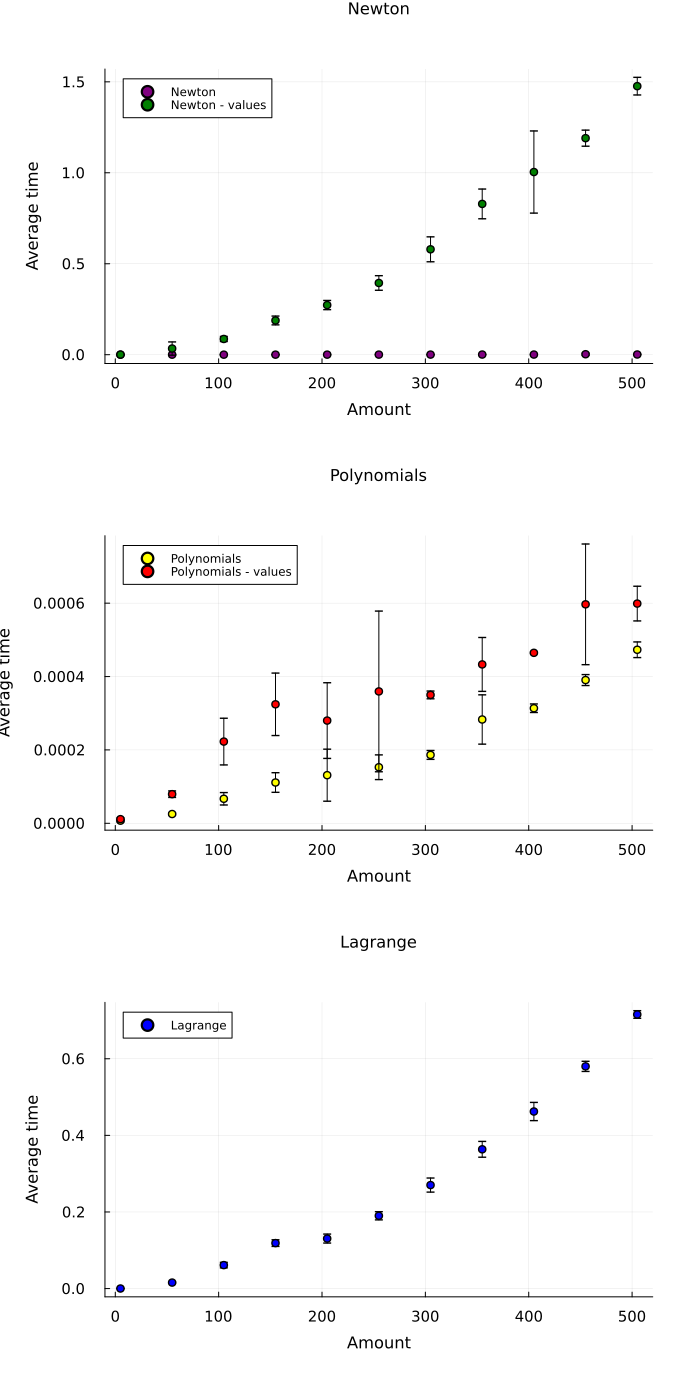

In [68]:
scatter(
    df2.Nodes, 
    size = (700, 1400), 
    margin=10mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Amount",
    ylabel = "Average time",
    [df2.m_newt, df2.m_polyn, df2.m_lagr, df2.m_newt2, df2.m_polyn2], 
    title = ["Newton" "Polynomials" "Lagrange"], 
    label = ["Newton"  "Polynomials" "Lagrange" "Newton - values" "Polynomials - values"],
    color = [:purple :yellow :blue :green :red],
    yerr = [df2.s_newt df2.s_polyn df2.s_lagr df2.s_newt2 df2.s_polyn2], 
    layout = grid(3,1),
    legend = true
)


### Zad5
Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

In [69]:
function Neville(x_vals::Vector{Float64}, y_vals::Vector{Float64}, x)
    n = length(x_vals)
    p = copy(y_vals)
    for k = 1:n
        for j in k-1:-1:1
            p[j]=p[j+1]+(p[j+1]-p[j])*(x-x_vals[k])/(x_vals[k]-x_vals[j])
        end
    end
    return p[1]
end


Neville (generic function with 1 method)

In [70]:
tests = [1.5,2.77,3.543, 5.5, 6.6]

println("Neville\t\t   Lagrange\t\t Difference")
for test in tests
    print(Neville(x_vals,y_vals,test),"  ",Lagrange(x_vals,y_vals,test),"  ",Neville(x_vals,y_vals,test)-Lagrange(x_vals,y_vals,test),"\n")
end

Neville		   Lagrange		 Difference
0.342889419671034  0.34288941967103403  -5.551115123125783e-17
-0.08681708517081999  -0.08681708517082001  2.7755575615628914e-17
0.4861054298088065  0.4861054298088065  0.0
0.1999827962629508  0.19998279626295068  1.1102230246251565e-16
2.326456621254874  2.326456621254874  0.0


### Zad6
Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 

In [71]:
interp_cubic = CubicSplineInterpolation(opints_nr, y_vals)
cub=[interp_cubic(x) for x in distrib]

701-element Vector{Float64}:
 0.3336612200551969
 0.32895227571619634
 0.3242442325599086
 0.3195379917690465
 0.3148344545263227
 0.3101345220144501
 0.30543909541614134
 0.3007490759141095
 0.29606536469106715
 0.29138886292972704
 0.28672047181280214
 0.2820610925230051
 0.2774116262430488
 ⋮
 0.9838598461537489
 0.9822208713883138
 0.9805680732963968
 0.9789028342106467
 0.9772265364637108
 0.9755405623882375
 0.9738462943168754
 0.9721451145822722
 0.9704384055170765
 0.968727549453936
 0.9670139287254992
 0.9652989256644144

In [73]:
interp_linear = LinearInterpolation(opints_nr, y_vals)
lin=[interp_linear(x) for x in distrib]

701-element Vector{Float64}:
 0.33366122005519694
 0.33045409670706316
 0.3272469733589294
 0.3240398500107956
 0.3208327266626619
 0.3176256033145281
 0.3144184799663943
 0.3112113566182605
 0.3080042332701267
 0.30479710992199294
 0.30158998657385916
 0.29838286322572544
 0.29517573987759166
 ⋮
 0.9588237283962359
 0.9594123826933431
 0.9600010369904501
 0.9605896912875572
 0.9611783455846643
 0.9617669998817716
 0.9623556541788787
 0.9629443084759858
 0.9635329627730929
 0.9641216170702
 0.9647102713673072
 0.9652989256644143

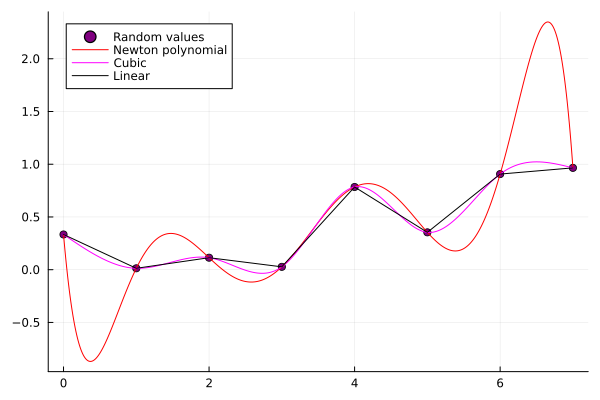

In [74]:
scatter(x_vals,y_vals,label="Random values", color = :purple)
plot!(distrib,new_polynom,label="Newton polynomial", color = :red)
plot!(distrib,cub, label="Cubic", color = :magenta)
plot!(distrib,lin, label="Linear", color = :black)